In [15]:
!pip install seaborn matplotlib --quiet

# Differential Equation Solving with SciPy

This notebook demonstrates the distinctions in differential equation solving techniques offered by the Python [SciPy](scipy.org) package. There are two primary approaches for ordinary differential equations (ODE) in SciPy:
1. The older `scipy.integrate.odeint` function
2. The newer `scipy.integrate.solve_ivp` function

(Apologies to any approaches we have failed to recognize!)

## Introduction and Acknowledgement

To begin, we should mention that there is an accessible and comprehensive Python math text from UCBerkeley called [Python Numerical Methods](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/Index.html). Chapter 22 is called "[Ordinary Differential Equation - Initial Value Problems](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter22.00-ODE-Initial-Value-Problems.html)," and it might be pointed out that the difference between the two is that initial value problems (IVP) supply starting conditions to the ordinary differential equations so that they can be solved with a unique numerical functions.

We'll start with the basic ordinary differential equation from the book, and, like the book, we will turn it into an IVP by setting an initial condition:

$$\begin{equation}
    \begin{aligned}
        \frac{dS(t)}{dt} &= \cos(t) \\[10pt]
        S(t0) &= S0
    \end{aligned}
\end{equation}$$

The reason is that this is such a useful example is that the precise solution of the problem, you might recall from trigonometry, is $$S(t) = sin(t)$$.

This is especially useful for our purposes. In the book, the code applied (and we will not yet use the plot) uses the `solve_ivp` solver with "traditional" settings, and then simply calculates sin(t) for the same values of t, in order to compare the two outcomes. We will make a few changes to the code from the book in order to deal with some complications between the two solvers:

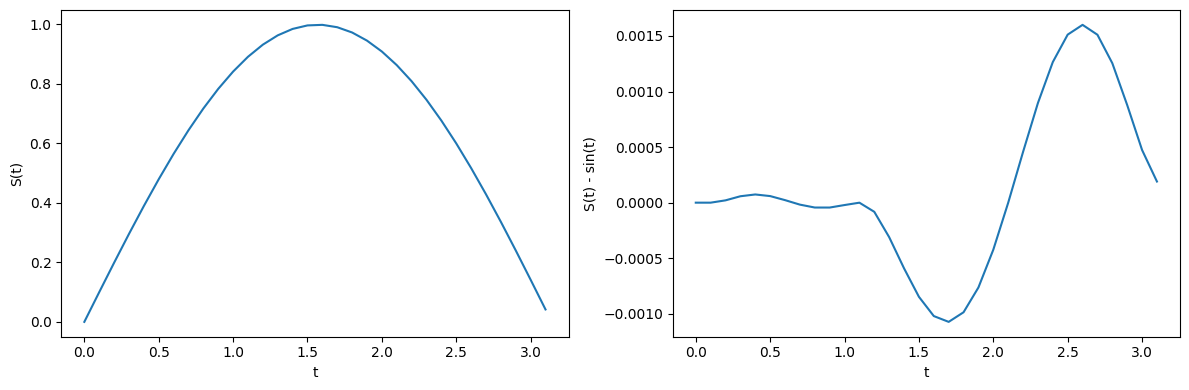

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

%matplotlib inline

def cos_func(t, S):  # avoid using lambda function since the signatures are a bit confusing
    """
    A function for solve_ivp.
    """
    # this system is state-independent and S is unused. it is still required for solve_ivp.
    dsdt = np.cos(t)
    return dsdt

t_eval = np.arange(0, np.pi, 0.1)
solution = solve_ivp(cos_func, [0, np.pi], [0], t_eval)

# relevant here, within solution we have:
# t: the time values
# y: the solution values
# sol: the solution values as an array
# success: a boolean indicating whether the solver was successful
# message: a message from the solverA

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(solution.t, solution.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(solution.t, solution.y[0] - np.sin(solution.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()


A lovely approach, although it bears mentioning that the scale on the error plot could lead to a bit of confusion. Here are the same plots, except this time using congruous scales:

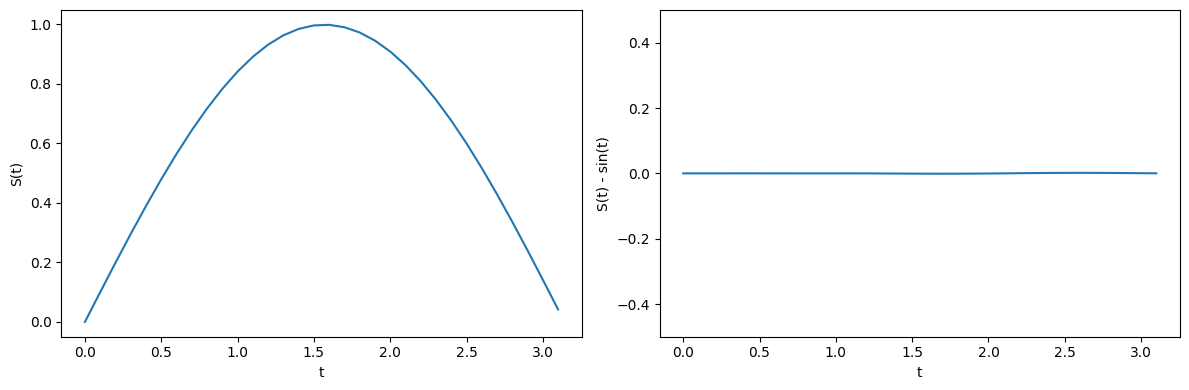

In [32]:
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(solution.t, solution.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(solution.t, solution.y[0] - np.sin(solution.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.ylim(-0.5, 0.5)
plt.tight_layout()
plt.show()

As we can (can't!) see, solve_ivp performs well enough relative to scale for a small system like this one.

## The Lorenz System

# WIP

This example is adopted from the book chapter's [Problems](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter22.08-Summary-and-Problems.html#problems) section.

The Lorenz system is a set of three coupled, nonlinear differential equations:

$$\begin{align}
\frac{dx}{dt} &= \sigma(y - x) \\
\frac{dy}{dt} &= x(\rho - z) - y \\
\frac{dz}{dt} &= xy - \beta z
\end{align}$$

Where:
- $\sigma$ (sigma) is the Prandtl number
- $\rho$ (rho) is the Rayleigh number
- $\beta$ (beta) is related to the physical dimensions of the system

The classic parameter values are $\sigma = 10$, $\rho = 28$, and $\beta = 8/3$, which produce the famous "butterfly" strange attractor.

We will set up our system and conditions below. Also, we'll put this here: 🦋

In [17]:
sigma = 10
rho = 28
beta = 8/3

def lorenz(S, t):
    x, y, z = S
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Initial conditions
S0 = [1.0, 0.0, 0.0]  # classic starting point

# Discretize time
t = np.linspace(0, 40, 10000)

In [18]:
# We will almost certainly need these three standards:

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt



## `odeint`

Starting with `odeint`, the older of the two solutions scipy offers, we might point out that the package always operates using the LSODA solver written in FORTRAN at [Lawrence Livermore NL](https://computing.llnl.gov/projects/odepack). The L in LSODA stands for Livermore, in fact, a bit of trivia that can be gleaned from the [excellent README file](https://github.com/scipy/scipy/tree/main/scipy/integrate/odepack) for ODEPACK solvers at the scipy repo.

Let's work with Lorenz in `odeint`.

In [19]:


S, info = odeint(lorenz, state0, t)

print("Solution shape:", sol.shape)
print("Solution:", sol)
print("Info:", info)


NameError: name 'state0' is not defined

### Notes


### References

Kong, Q., Siauw, T., & Bayen, A. M. (2021). *Python Programming And Numerical Methods: A Guide For Engineers And Scientists*. Academic Press. Available online at: https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/

Lorenz, E. N. (1963). Deterministic nonperiodic flow. *Journal of the Atmospheric Sciences*, 20(2), 130-141.

SciPy Documentation. (n.d.). Integration and ODEs (`scipy.integrate`). Retrieved from https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html